In [59]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [60]:
olympic_original= pd.read_csv('/content/athlete_events.csv')  #Importing Dataset 
noc_regions= pd.read_csv('/content/noc_regions.csv')  #Importing Dataset
olympic_original.head(10) #Printing the first 10 elements of the dataset as a test
#noc_regions.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [61]:
#generating the description to identify the first, second, and third quantiles to determine the outliers
olympic_original.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [62]:
#Handling outliers by replacing values below Q1-1QR*1.5 and values above Q3+IQR*1.5 with the median
Q1 = olympic_original.Weight.quantile(0.25)
Q3 = olympic_original.Weight.quantile(0.75)
IQR = Q3 - Q1
for col in olympic_original:
    olympic_original.loc[olympic_original['Weight'].between(25,31.5), 'Weight'] = 175
    olympic_original.loc[olympic_original['Weight'].between(107.5,214), 'Weight'] = 175


In [63]:
#Handling outliers by replacing values below Q1-1QR*1.5 and values above Q3+IQR*1.5 with the median
Q1 = olympic_original.Height.quantile(0.25)
Q3 = olympic_original.Height.quantile(0.75)
IQR = Q3 - Q1
for col in olympic_original:
    olympic_original.loc[olympic_original['Height'].between(127,145.5), 'Height'] = 175
    olympic_original.loc[olympic_original['Height'].between(205.5,226), 'Height'] = 175

#print(IQR)

#olympic_original['Height'].describe()

#print(olympic_original.Height < (Q1 - 1.5 * IQR)) or (olympic_original.Height > (Q3 + 1.5 * IQR))


In [64]:
olympic_original.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.344777,71.587348,1978.378480
std,39022.286345,6.393561,10.158135,18.274491,29.877632
min,1.000000,10.000000,146.000000,32.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,182.000000,79.000000,2002.000000
max,135571.000000,97.000000,205.000000,175.000000,2016.000000


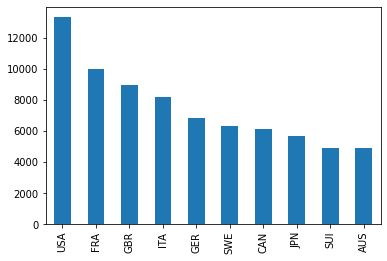

In [65]:
#Question 1: Number of male participants for the top 10 countries (based on amount of male particpants sent)

olympic_original_sexM = olympic_original[olympic_original['Sex']=='M'] #Extracting Male participanta only from the dataset


#Bar Graph: Comparing between the count of the male participants for different groups (Top 10 countries)

tp10_men = olympic_original_sexM["NOC"] # Highest number of male participants per noc
tpval_men=tp10_men.value_counts().head(10)
tpval_men.plot(kind='bar') #Plots the top 10 countries for male participants




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


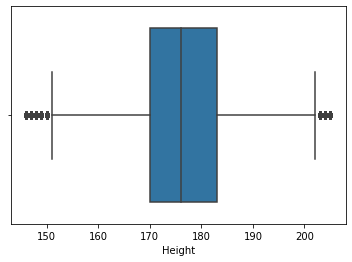

In [66]:
#Question 2: Height distribution for all Olympians throughout the years

# Clean dataset for data values with no height
olympic_original_cleaned_height = olympic_original.dropna(axis='index', subset=['Height'])
#olympic_original_cleaned_height

# Remove duplicates from dataset (based on ID)
olympic_original_cleaned_height = olympic_original_cleaned_height.drop_duplicates(subset ="ID")
#olympic_original_cleaned_height.head(10)

#Box Plot: Used to show the distribution of Height data for olympians. (Shows quartiles and outliers)

#Boxplot the data extracted
sns.boxplot(olympic_original_cleaned_height['Height'])

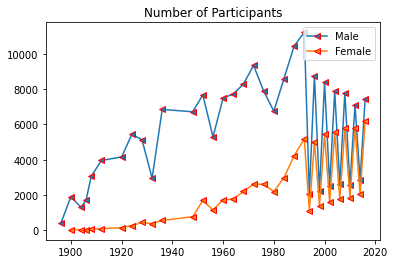

In [67]:
#Question 3: Number of participants between the Years

olympic_sexM = olympic_original[olympic_original['Sex']=='M'] #Extracting Male participanta only from the dataset
olympic_sexF = olympic_original[olympic_original['Sex']=='F']  #Extracting Female participanta only from the dataset

olympic_sexM_sorted = olympic_sexM.sort_values(by='Year', ascending=True) #Sort dataset according to year


olympic_sexF_sorted = olympic_sexF.sort_values(by='Year', ascending=True) #Sort dataset according to year


yearcount_men = olympic_sexM_sorted["Year"].value_counts() #Obtain values from sorted dataset (Males)
yearcount_men_sorted = yearcount_men.sort_index()

yearcount_women = olympic_sexF_sorted["Year"].value_counts() #Obtain values from sorted dataset (Females)
yearcount_women_sorted = yearcount_women.sort_index()

#Line Graph: Track changes of male and female participants each year over time.

plt.plot(yearcount_men_sorted.index,yearcount_men_sorted, label="Male", marker='<', markeredgecolor='red') #Plot the first set of data on plot
plt.plot(yearcount_women_sorted.index,yearcount_women_sorted, label="Female", marker='<', markeredgecolor='red') #Plot the second set of data on plot
plt.title('Number of Participants') #Assign title to graph
plt.locator_params(integer=True) #to make ticks on axes integers
plt.legend(loc=1)


# Scatter Plot



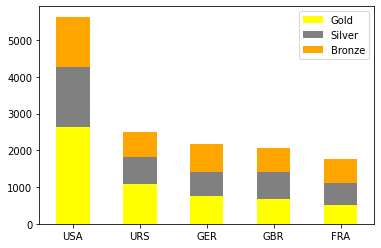

In [68]:
# Question 4: Top 5 performing countries in terms of medals and their medal distribution

olympic_original_cleaned_medal = olympic_original.dropna(axis='index', subset=['Medal']) #Drop rows in which no column data is avaliable



#Sort Data by country for the top 5 performing countries
USADataFrame = olympic_original_cleaned_medal[olympic_original_cleaned_medal['NOC'] == 'USA'] 
URSDataframe = olympic_original_cleaned_medal[olympic_original_cleaned_medal['NOC'] == 'URS']
GERDataFrame = olympic_original_cleaned_medal[olympic_original_cleaned_medal['NOC'] == 'GER']
GBRDataFrame = olympic_original_cleaned_medal[olympic_original_cleaned_medal['NOC'] == 'GBR']
FRADataFrame = olympic_original_cleaned_medal[olympic_original_cleaned_medal['NOC'] == 'FRA']

#Sorting data by type of medal

USAGold = USADataFrame[USADataFrame['Medal'] == 'Gold']
USASilver = USADataFrame[USADataFrame['Medal'] == 'Silver']
USABronze = USADataFrame[USADataFrame['Medal'] == 'Bronze']


URSGold = URSDataframe[URSDataframe['Medal'] == 'Gold']
URSSilver = URSDataframe[URSDataframe['Medal'] == 'Silver']
URSBronze = URSDataframe[URSDataframe['Medal'] == 'Bronze']


GERGold = GERDataFrame[GERDataFrame['Medal'] == 'Gold']
GERSilver = GERDataFrame[GERDataFrame['Medal'] == 'Silver']
GERBronze = GERDataFrame[GERDataFrame['Medal'] == 'Bronze']


GBRGold = GBRDataFrame[GBRDataFrame['Medal'] == 'Gold']
GBRSilver = GBRDataFrame[GBRDataFrame['Medal'] == 'Silver']
GBRBronze = GBRDataFrame[GBRDataFrame['Medal'] == 'Bronze']


FRAGold = FRADataFrame[FRADataFrame['Medal'] == 'Gold']
FRASilver = FRADataFrame[FRADataFrame['Medal'] == 'Silver']
FRABronze = FRADataFrame[FRADataFrame['Medal'] == 'Bronze']

USA_Medals = USADataFrame["Medal"].value_counts()

#Assigning number of medals in arrays to be used for the stacked bar chart then plot it with the data

Gold = [len(USAGold), len(URSGold), len(GERGold), len(GBRGold), len(FRAGold)]
Silver =[len(USASilver), len(URSSilver), len(GERSilver), len(GBRSilver), len(FRASilver)]
Bronze = [len(USABronze), len(URSBronze), len(GERBronze), len(GBRBronze), len(FRABronze)]

index = ['USA', 'URS', 'GER', 'GBR', 'FRA']
df = pd.DataFrame({'Gold': Gold,
                   'Silver': Silver,
                   'Bronze': Bronze}, index=index)

#Stacked Bar Chart: Showing comparisons between medal categories for the top 5 performing countries.

ax = df.plot.bar(rot=0, stacked = True, color={"Gold": "yellow", "Silver": "gray", "Bronze": "orange"})





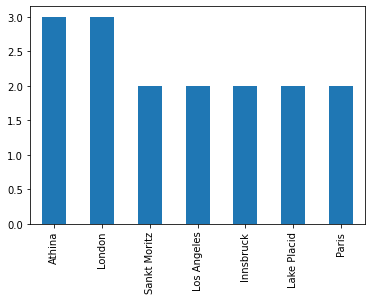

In [69]:
#Question 5: Which Cities hosted the games more than once


#Drop rows where city column is empty
cleaned_cities = olympic_original.dropna(axis='index', subset=['City']) 

#Remove duplicates based on games
cleaned_cities_Duplicates = cleaned_cities.drop_duplicates(subset=['Games'])

#Sort values
cleaned_cities_sorted = cleaned_cities_Duplicates.sort_values(by=['Games'], ascending=True)

#Count Sorted Values
cleaned_cities_sorted_count = cleaned_cities_sorted['City'].value_counts()

#Bar Graph: Displaying different countries that hosted the Olympics more than once, and how many times they were hosted.

#Plot bar chart
cleaned_cities_sorted_count.head(7).plot(kind='bar')



#Milestone 2

In [72]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [73]:
data1 = pd.read_csv('/content/athlete_events.csv')
data2 = pd.read_csv('/content/noc_regions.csv')

# using merge function by setting how='inner'
output = pd.merge(data1, data2, 
                   on='NOC', 
                   how='inner')

output.head()
  

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN


In [74]:
#Data Cleaning
#Dropping the column 'notes' as it will not be used and it contains a lot of missing values
#Removing the columns that contain irrelevant information for the question we want to answer

output2 = output.drop(['notes', 'Sport', 'Height', 'Weight', 'Name', 'Age', 'Year', 'Games', 'Season', 'Event', 'Sex'], axis=1)

output2.head(10)

,ID,Team,NOC,City,Medal,region
0,1,China,CHN,Barcelona,NaN,China
1,2,China,CHN,London,NaN,China
2,602,China,CHN,Sydney,NaN,China
3,1463,China,CHN,Athina,NaN,China
4,1464,China,CHN,Rio de Janeiro,NaN,China
5,1464,China,CHN,Rio de Janeiro,NaN,China
6,3605,China,CHN,Torino,NaN,China
7,3605,China,CHN,Torino,NaN,China
8,3610,China,CHN,Nagano,Silver,China
9,3610,China,CHN,Nagano,NaN,China


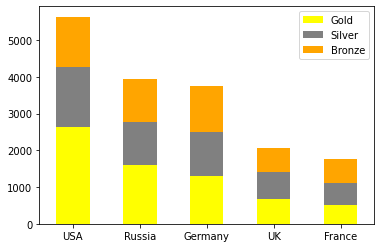

In [75]:
# Question 6: Top 5 performing countries in terms of medals and their medal distribution (Based on region)(Similar to Question 4 in Milestone 1)

output3 = output2.dropna(axis='index', subset=['Medal']) #Drop rows in which no column data is avaliable



#Sort Data by country for the top 5 performing countries
USADataFrame = output3[output3['region'] == 'USA'] 
URSDataframe = output3[output3['region'] == 'Russia']
GERDataFrame = output3[output3['region'] == 'Germany']
GBRDataFrame = output3[output3['region'] == 'UK']
FRADataFrame = output3[output3['region'] == 'France']

#Sorting data by type of medal

USAGold = USADataFrame[USADataFrame['Medal'] == 'Gold']
USASilver = USADataFrame[USADataFrame['Medal'] == 'Silver']
USABronze = USADataFrame[USADataFrame['Medal'] == 'Bronze']


URSGold = URSDataframe[URSDataframe['Medal'] == 'Gold']
URSSilver = URSDataframe[URSDataframe['Medal'] == 'Silver']
URSBronze = URSDataframe[URSDataframe['Medal'] == 'Bronze']


GERGold = GERDataFrame[GERDataFrame['Medal'] == 'Gold']
GERSilver = GERDataFrame[GERDataFrame['Medal'] == 'Silver']
GERBronze = GERDataFrame[GERDataFrame['Medal'] == 'Bronze']


GBRGold = GBRDataFrame[GBRDataFrame['Medal'] == 'Gold']
GBRSilver = GBRDataFrame[GBRDataFrame['Medal'] == 'Silver']
GBRBronze = GBRDataFrame[GBRDataFrame['Medal'] == 'Bronze']


FRAGold = FRADataFrame[FRADataFrame['Medal'] == 'Gold']
FRASilver = FRADataFrame[FRADataFrame['Medal'] == 'Silver']
FRABronze = FRADataFrame[FRADataFrame['Medal'] == 'Bronze']

USA_Medals = USADataFrame["Medal"].value_counts()

#Assigning number of medals in arrays to be used for the stacked bar chart then plot it with the data

Gold = [len(USAGold), len(URSGold), len(GERGold), len(GBRGold), len(FRAGold)]
Silver =[len(USASilver), len(URSSilver), len(GERSilver), len(GBRSilver), len(FRASilver)]
Bronze = [len(USABronze), len(URSBronze), len(GERBronze), len(GBRBronze), len(FRABronze)]

index = ['USA', 'Russia', 'Germany', 'UK', 'France']
df = pd.DataFrame({'Gold': Gold,
                   'Silver': Silver,
                   'Bronze': Bronze}, index=index)

#Stacked Bar Chart: Showing comparisons between medal categories for the top 5 performing countries.

ax = df.plot.bar(rot=0, stacked = True, color={"Gold": "yellow", "Silver": "gray", "Bronze": "orange"})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


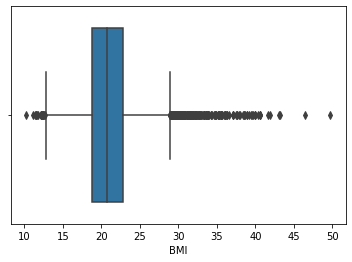

In [76]:
#Feature Engineering (1)
#Quesion 7: BMI of olympians who won olympic medals


#Remove duplicate olympians based on ID
#Remove Columns irrelevant to BMW calculation
output4 = output.drop(['notes', 'Year', 'Games', 'Season', 'Event', 'Sport', 'NOC', 'Team', 'City','region'], axis=1)
output4 = output4.drop_duplicates(subset ="ID")

#Calculate BMI
output4['BMI'] = (output4['Weight'])/(output4['Height']/50)

#Obesity Indicator based on BMI
output4['Obesity Indicator'] = (output4['BMI'] >= 25)*1


#Remove any olympians who have not won medals
output5 = output4.dropna(axis='index', subset=['Medal'])

#Boxplot to figure out the average winning olympians BMI
sns.boxplot(output5['BMI'])




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


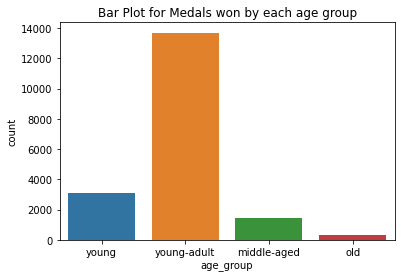

In [77]:
#Feature Engineering (2)
#Question 8: Number of medals won by each age group

#Encoding Age groups
output6 = output.dropna(axis='index', subset=['Age'])
output6 = output6.drop_duplicates(subset ="ID")
output6 = output6.dropna(axis='index', subset=['Medal'])


age_group = pd.cut(output.Age, [10,20,30,40,100],labels=['young','young-adult', 'middle-aged','old'])
output6["age_group"] = age_group

output7 = output6.drop(['notes', 'Year', 'Games', 'Season', 'Event', 'Sport', 'NOC', 'Team', 'City','region','Age','Sex','Height', 'Weight'], axis=1)

#output7.head(10)

#out7_young.shape[0]

sns.countplot('age_group',data=output7)
plt.title('Bar Plot for Medals won by each age group')
plt.show()

#Analysis
As for this analysis part, it was already implemented in the previous submission of milestone 1, so this file should contain all the requirements of milestone 1 + milestone 2
